In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 25.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


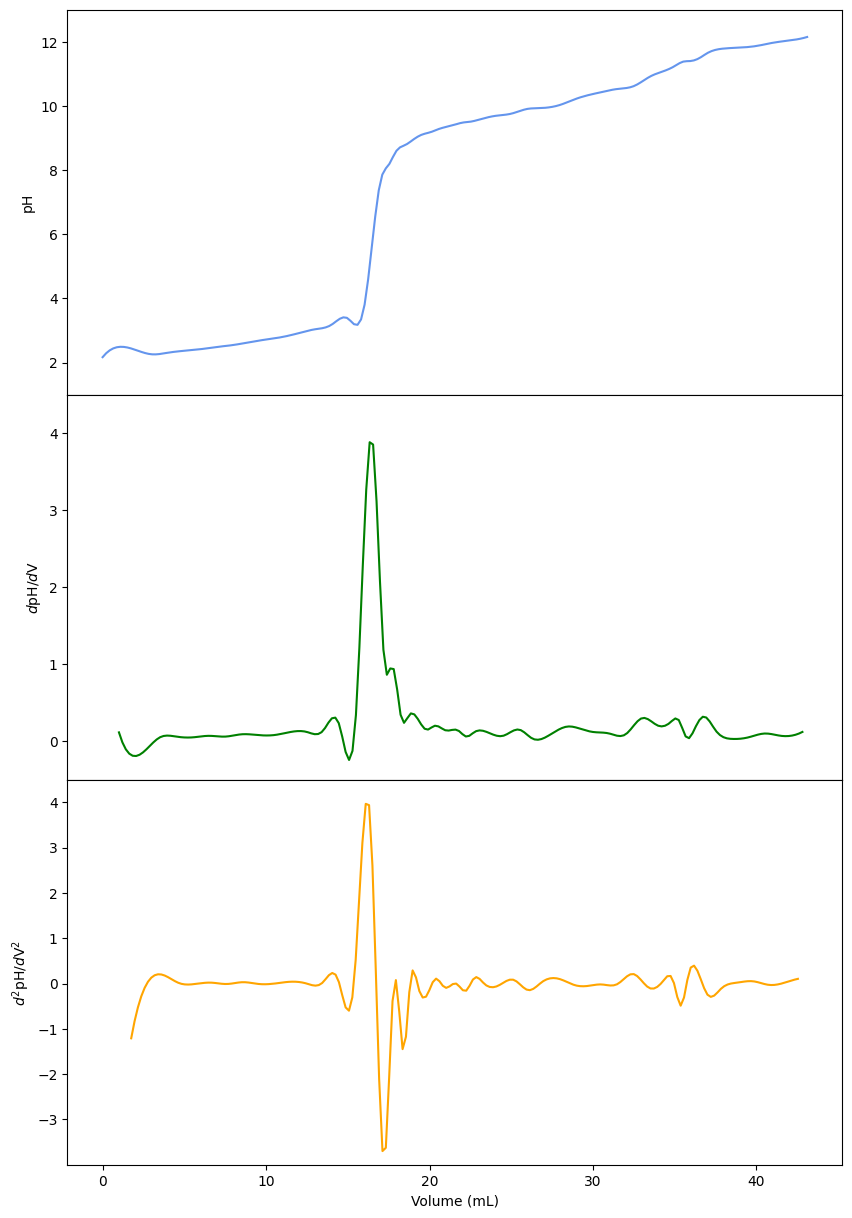

In [11]:
import numpy as np
import matplotlib.pyplot as plt

#adding to "smooth data"
from scipy.interpolate import make_interp_spline, BSpline

#establishes dimensions and relative locations of subplots (in this case, 3 rows, one column)
fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(10, 15), sharex=True)
fig.subplots_adjust(hspace=0)

#experimental data
v = np.array([0.00, 2.00, 3.00, 4.00, 5.00, 6.00, 7.00, 8.00, 9.00, 10.00, 11.00, 12.00, 13.00, 14.00, 15.00, 16.00, 17.00, 17.50, 17.80, 18.00, 18.50, 19.00, 19.50, 20.10, 20.50, 21.50, 22.00, 22.50, 23.00, 24.00, 25.00, 26.00, 26.60, 27.90, 29.00, 29.50, 30.50, 31.50, 32.50, 33.50, 34.50, 35.02, 35.50, 35.95, 36.50, 37.00, 38.00, 39.00, 40.00, 41.00, 42.00, 42.52, 43.10])
pH = np.array([2.17, 2.40, 2.26, 2.31, 2.37, 2.42, 2.49, 2.55, 2.64, 2.72, 2.80, 2.92, 3.04, 3.18, 3.38, 3.73, 7.66, 8.16, 8.45, 8.62, 8.78, 8.95, 9.10, 9.19, 9.27, 9.41, 9.48, 9.51, 9.57, 9.69, 9.76, 9.91, 9.93, 10.02, 10.23, 10.31, 10.43, 10.53, 10.62, 10.92, 11.12, 11.25, 11.38, 11.40, 11.49, 11.65, 11.79, 11.82, 11.87, 11.97, 12.04, 12.08, 12.15
])

#smoothed data for experimental data
vnew = np.linspace(v.min(), v.max(), 200) 
#define spline
spl = make_interp_spline(v, pH, k=3)
pH_smooth = spl(vnew)

#first derivative
dv = np.array([(v[i+1] + v[i])/2 for i in range(len(v)-1)])
dpH = np.array([(pH[i+1]-pH[i])/(v[i+1]-v[i]) for i in range (len(v)-1)])

#smoothed data for 1st derivative
dvnew = np.linspace(dv.min(), dv.max(), 200) 
#define spline
dspl = make_interp_spline(dv, dpH, k=3)
dpH_smooth = dspl(dvnew)


#second derivative
ddv = np.array([(dv[i+1] + dv[i])/2 for i in range(len(dv)-1)])
ddpH = np.array([(dpH[i+1]-dpH[i])/(dv[i+1]-dv[i]) for i in range (len(dv)-1)])

#smoothed data for 1st derivative
ddvnew = np.linspace(ddv.min(), ddv.max(), 200) 
#define spline
ddspl = make_interp_spline(ddv, ddpH, k=3)
ddpH_smooth = ddspl(dvnew)

#eqp = np.where(ddpH == 0)
#veqp = ddv[eqp]
#print (eqp)
#print (veqp)

#graph of titration alone
ax1.plot(vnew, pH_smooth, color='cornflowerblue')
#ax1.set_xlim(0, 55)
ax1.set_ylim(1,13)
ax1.set_yticks(np.arange(2,14,2))
ax1.set_ylabel('pH')
ax1.grid(False)

#graph of 1st derivative of titration 
ax2.plot(dvnew, dpH_smooth, color='green')
#ax2.set_xlim(0, 55)
ax2.set_ylim(-0.5,4.5)
ax2.set_yticks(np.arange(0,5,1))
ax2.set_ylabel('$d$pH/$d$V')
ax2.grid(False)

#graph of 2nd derivative of titration 
ax3.plot(ddvnew, ddpH_smooth, color='orange')
#ax3.set_xlim(0, 55)
ax3.set_ylim(-4,4.5)
ax3.set_yticks(np.arange(-3,5,1))
ax3.set_xlabel('Volume (mL)')
ax3.set_ylabel('$d^2$pH/$d\mathrm{V}^2$')
ax3.grid(False)
